In [179]:
sampl_freq = 0.01
number_of_coef = 1024
num_of_null_coef = 23
num_of_not_null_coef = 1001
eps = 0.0000001

In [180]:
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt


def fft(values):
    val_len = len(values)
    
    t = cmath.exp(-2 * math.pi * 1j / val_len)

    if val_len > 1:
        values = fft(values[::2]) + fft(values[1::2])

        for k in range(val_len // 2):
            k_value = values[k]
            values[k] = k_value + t ** k * values[k + val_len // 2]
            values[k + val_len // 2] = k_value - t ** k * values[k + val_len // 2]

    return values


def ifft(signal):
    timeSignal = fft([x.conjugate() for x in signal])
    return [x.conjugate() / len(signal) for x in timeSignal]


def apply_transform(func):
    values = []
    for i in range(0, num_of_not_null_coef):
        values.append(func(i * sampl_freq))
    for i in range(0, num_of_null_coef):
        values.append(0)
    return fft(values)


def apply_reverse(values, D = 0):
    i = 0
    while i < number_of_coef * D:
        values[- 24 - i] = 0
        i += 1
    rev_values = ifft(values)
    rval = [c.real if abs(c) > eps else 0 for c in rev_values]
    return rval



In [181]:
def print_figure(values):
    x_axis = [(i * sampl_freq) for i in range(0, num_of_not_null_coef - 1)]
    plt.plot(x_axis, values[:(num_of_not_null_coef - 1)], 'r--')
    plt.style.use('ggplot')
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.show()


def id(x):
    return x

def sin_square(x):
    return math.sin(np.square(x))


def sin_frac_x(x):
    if x == 0:
        return 1
    else:
        return math.sin(x)/x

In [182]:
def construct_a_func_graph(func, fraction_of_zeros):
    fft_array = np.array(apply_transform(func))
    values = []
    for i in range(0, num_of_not_null_coef):
        values.append(func(i * sampl_freq))
    for i in range(0, num_of_null_coef):
        values.append(0)
    print_figure(values)

    reversed_fft = apply_reverse(fft_array, fraction_of_zeros)
    print_figure(reversed_fft)


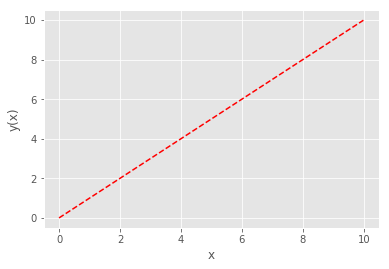

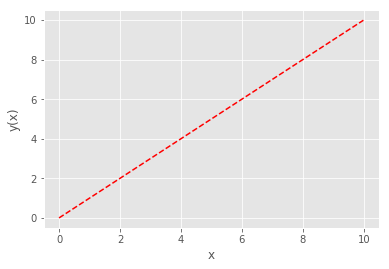

In [183]:
construct_a_func_graph(id, 0)

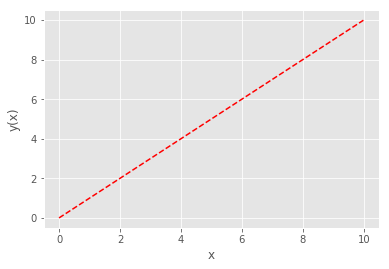

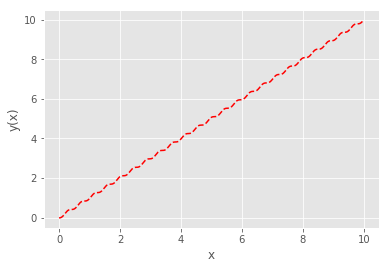

In [184]:
construct_a_func_graph(id, 0.00001)

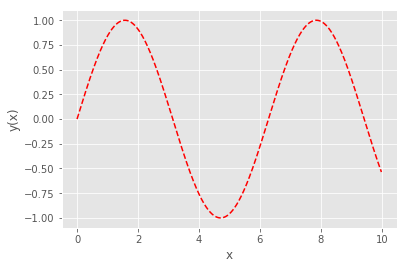

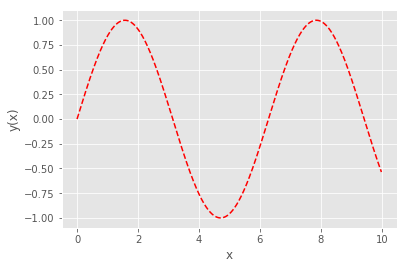

In [185]:
construct_a_func_graph(np.sin, 0)

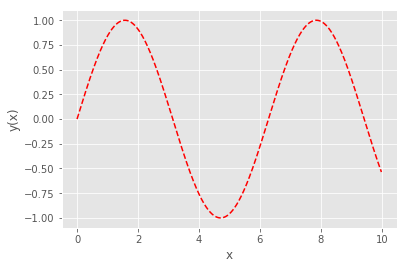

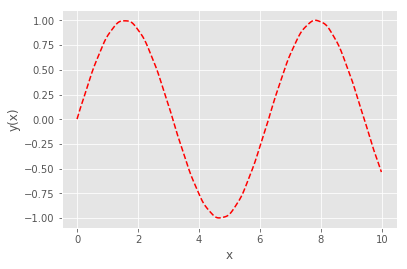

In [186]:
construct_a_func_graph(np.sin, 0.00001)

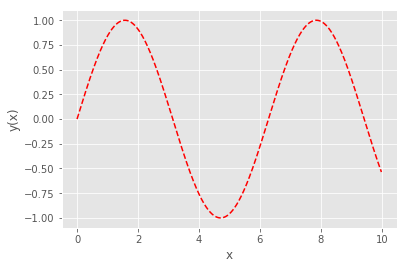

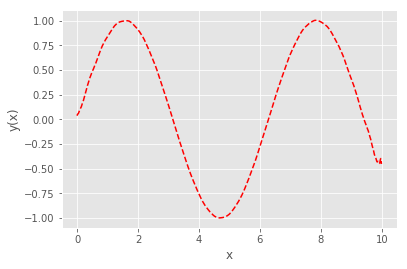

In [187]:
construct_a_func_graph(np.sin, 0.1)

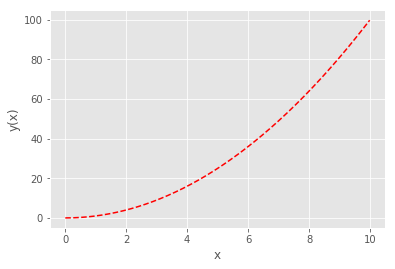

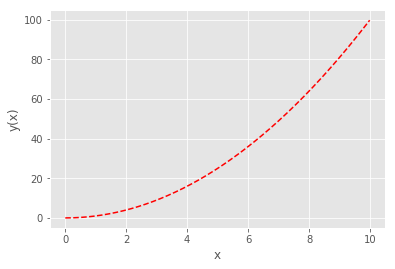

In [188]:
construct_a_func_graph(np.square, 0)

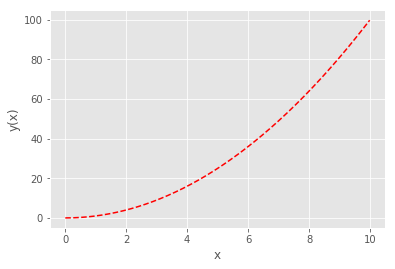

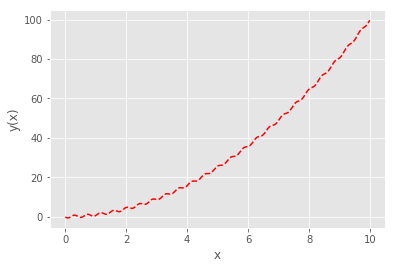

In [189]:
construct_a_func_graph(np.square, 0.00001)

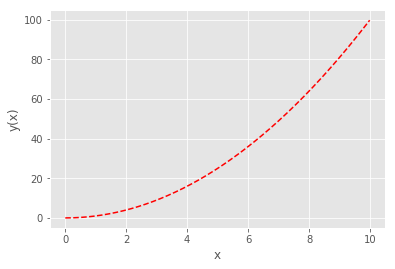

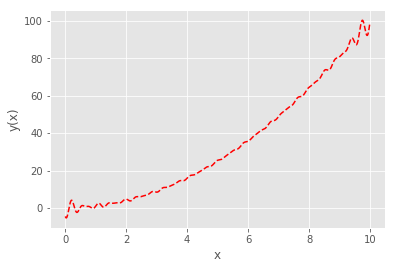

In [190]:
construct_a_func_graph(np.square, 0.01)

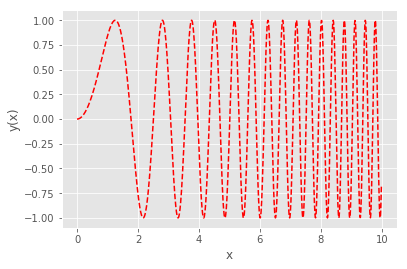

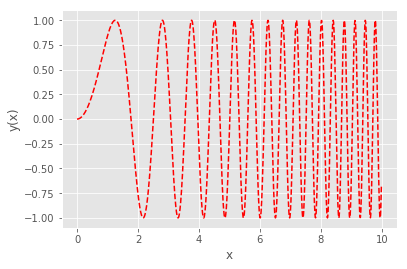

In [191]:
construct_a_func_graph(sin_square, 0)

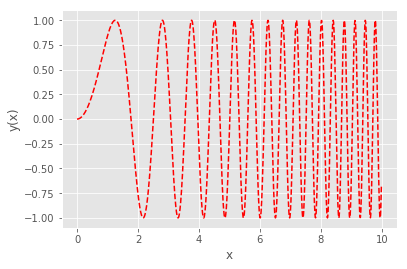

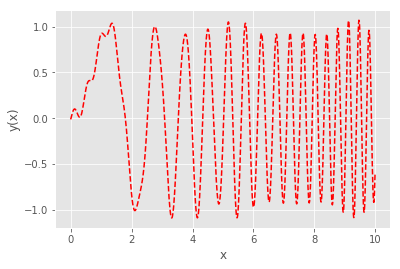

In [192]:
construct_a_func_graph(sin_square, 0.00001)

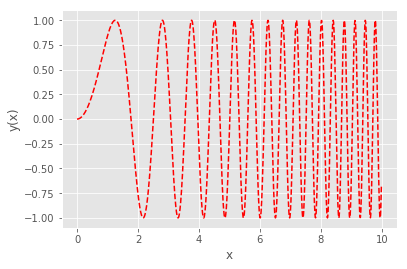

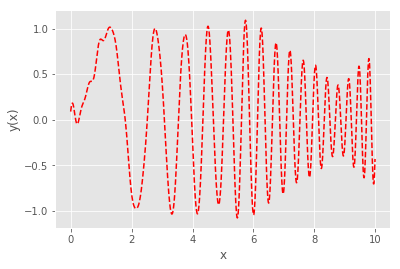

In [193]:
construct_a_func_graph(sin_square, 0.01)

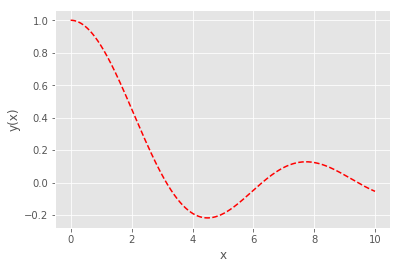

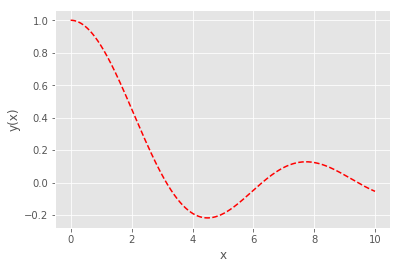

In [194]:
construct_a_func_graph(sin_frac_x, 0)

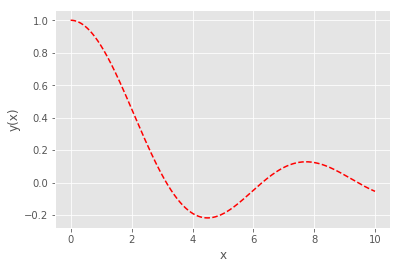

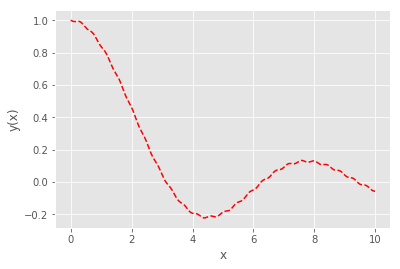

In [195]:
construct_a_func_graph(sin_frac_x, 0.00001)

## Чтобы график изменился, достаточно поменять долю нулевых коэффициентов